#  **Semester Project** - Feature Extraction and Audio Analysis in HRI

> - 😀 Name: **Léa Blinière**
> - ✉️ Email: **lea.bliniere@epfl.ch**
> - 🪪 SCIPER: **283670**

<div style="padding:15px 20px 20px 20px;border-left:3px solid green;background-color:#e4fae4;border-radius: 20px;">

### Table of Contents
- **[PART 1: Feature Extraction](#1)**
    - [1.1 Loading the Experience Feedback Questionnaire Data](#11)
    - [1.2 Feature Extraction](#12)
- **[PART 2: Data Exploration](#2)**
    - [2.1 Distribution of Features](#21)
    - [2.2 Distribution of Participants and Lessons](#22)
        - [2.2.1 Gender Distribution](#221)
        - [2.2.2 Starting Order Distribution](#222)
        - [2.2.3 Lesson Order Distribution](#223)
- **[PART 3: Feature Analysis](#3)**
    - [3.1 Features Audio](#31)
        - [3.1.1 Statistic Descriptive under the different conditions](#311)
        - [3.1.2 Impact of the Starting Order on the Features](#312)
        - [3.1.3 Impact of the Language on the Features](#313)
        - [3.1.4 Comparison of the interaction with a robot and wiht a human, Isolating other Effects](#314)
    - [3.2 Questionnaire Analysis](#32)
        - [3.2.2 Comparison of Comfort between Human and Robot: Visual Analysis](#322)
        - [3.2.2 Comparison of Comfort between Human and Robot depedending on the starting order: Visual Analysis](#322)

</div>



### **Loading Libraries**

In [1]:
import pandas as pd
import csv
import numpy as np
import pingouin as pg

from feature_extraction import *
from feature_analysis import *

<a name="1"></a>
## **PART 1: Feature Extraction**
---

### **1.1 Loading the Experience Feedback Questionnaire Data**

##### Questionnaire directory path 

In [2]:
QUESTIONNAIRE_PATH = "Data\Questionnaire.csv"

#### Read the csv file containing the questionnaire data 

In [3]:
dataframe_questionnaire = pd.read_csv(QUESTIONNAIRE_PATH)
dataframe_questionnaire.head()

,Code,Genre,Ordre [Robot ],Ordre [Humain],Ordre passage robot [A/H/S],Ordre passage humain [A/H/S],Humain,First Robot,First Humain,Confort Robot,Confort Humain,Naturelle,Compréhension,Comportement différent,Perturbé Anglais,Difficulté Question,ordre preference [A/H/S]
0,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,4,1,3,Oui,0,2,3/2/1
1,Part_2,F,1,2,2.1/1.1/3.1,1.2/2.2/3.2,F,Non,Non,4,5,4,4,Oui,4,2,3/1/2
2,Part_3,M,2,1,1.2/2.1/3.1,3.1/1.2/2.2,M,Non,Oui,3,5,2,0,Oui,1,1,3/1/2
3,Part_4,M,1,2,2.2/1.2/3.1,2.1/3.1/1.2,M,Oui,Non,3,5,1,1,Non,3,1,3/2/1
4,Part_5,M,2,1,3.1/1.2/2.1,1.2/2.1/3.2,F,Oui,Non,4,5,3,3,Non,2,2,3/1/2


### **1.2 Feature Extraction**

##### Audio directory path 

In [4]:
AUDIO_PATH = r"C:\Users\lea\OneDrive\Documents\Semester Project\Audio_process"

##### Extraction of the features

In [5]:
#data_features = folder_feature_extraction(AUDIO_PATH, dataframe_questionnaire)

##### Saving data

In [6]:
#data_features.to_csv('Data\data_features.csv', index=False)

<a name="1"></a>
## **PART 2: Data Exploration**
---

##### Loading data

In [7]:
data_features = pd.read_csv('Data\data_features.csv')
data_features.head()

,Code,Genre,Ordre [Robot ],Ordre [Humain],Ordre passage robot [A/H/S],Ordre passage humain [A/H/S],Humain,First Robot,First Humain,Confort Robot,...,mean_absolute_pitch_slope,mean_hnr,stddev_hnr,jitter,shimmer,silence_threshold,rate_of_speech,articulation_rate,speaking_duration,balance
0,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,433.07,10.15,7.22,0.03,0.12,-20,3.0,4,43.4,0.7
1,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,358.07,11.42,7.14,0.02,0.10,-20,3.0,4,34.3,0.8
2,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,482.08,2.68,4.12,0.05,0.19,-13,4.0,4,2.8,0.9
3,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,383.13,7.97,4.74,0.03,0.19,-18,4.0,4,24.0,1.0
4,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,471.74,9.36,5.82,0.03,0.15,-20,3.0,4,28.8,0.8


### **2.1 Distribution of the features**

####  Extract the audio features only

In [8]:
features = data_features.copy()

columns_to_drop = list(data_features.columns[:20])
columns_to_drop.append("silence_threshold")

features.drop(columns_to_drop, axis=1, inplace=True)
features.head()

,duration,mean_intensity,stddev_intensity,voiced_fraction,min_pitch,max_pitch,mean_pitch,stddev_pitch,mean_absolute_pitch_slope,mean_hnr,stddev_hnr,jitter,shimmer,rate_of_speech,articulation_rate,speaking_duration,balance
0,60.28,73.27,7.67,0.69,71.11,567.51,169.88,47.86,433.07,10.15,7.22,0.03,0.12,3.0,4,43.4,0.7
1,41.75,75.69,7.39,0.76,71.64,449.46,171.05,37.62,358.07,11.42,7.14,0.02,0.10,3.0,4,34.3,0.8
2,3.13,66.66,3.68,0.46,75.07,351.90,189.39,67.85,482.08,2.68,4.12,0.05,0.19,4.0,4,2.8,0.9
3,24.36,69.53,5.29,0.73,74.34,376.97,168.74,38.92,383.13,7.97,4.74,0.03,0.19,4.0,4,24.0,1.0
4,35.32,70.33,6.30,0.67,70.67,565.82,171.94,53.07,471.74,9.36,5.82,0.03,0.15,3.0,4,28.8,0.8


#### Analysis of Feature Distribution: Assessing Normality

In [9]:
normality = pg.normality(data = features, method = 'normaltest')
features_normal , features_non_normal = normality[normality['normal']== True ] , normality[normality['normal']== False ]  # normality[normality['normal'] == False]

In [10]:
print("Over all features, there are", len(features_normal), "normal distributed features and", len(features_non_normal), "non-normal features")

Over all features, there are 0 normal distributed features and 17 non-normal features


### **2.2 Distribution of the participants and Lessons**

#### **2.2.1 Gender Distribution**

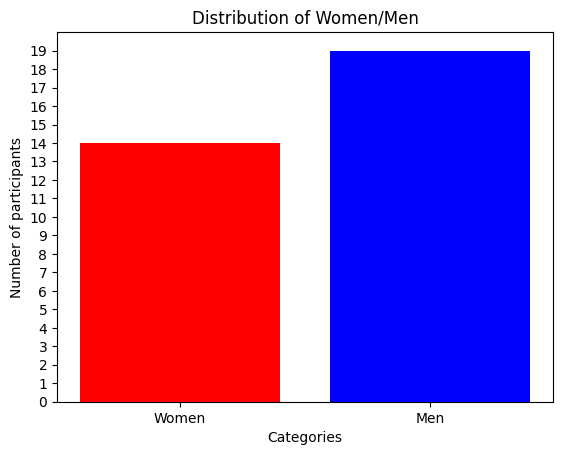

During the experiment, there were 19 men and 14 women.


In [11]:
plot_gender_distribution(dataframe_questionnaire)

#### **2.2.2 Distribution between Robot-First and Human-First**

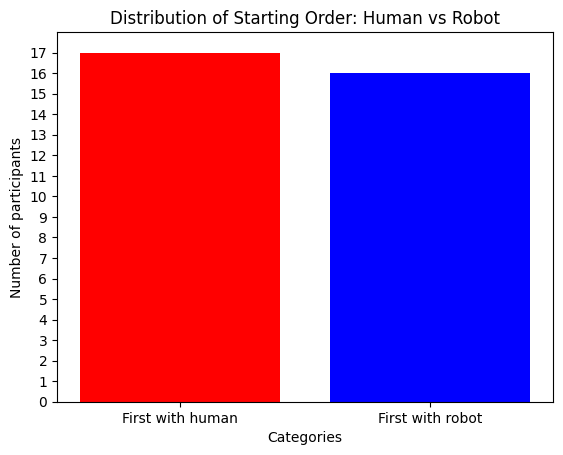

During the experiment, there were 17 participants starting with the human and 16 with the robot.


In [12]:
plot_starting_order_distribution(dataframe_questionnaire)

#### **2.2.3 Lesson Order Distribution**

In [13]:
lecon_robot, lecon_humain = ordre_passage(dataframe_questionnaire)

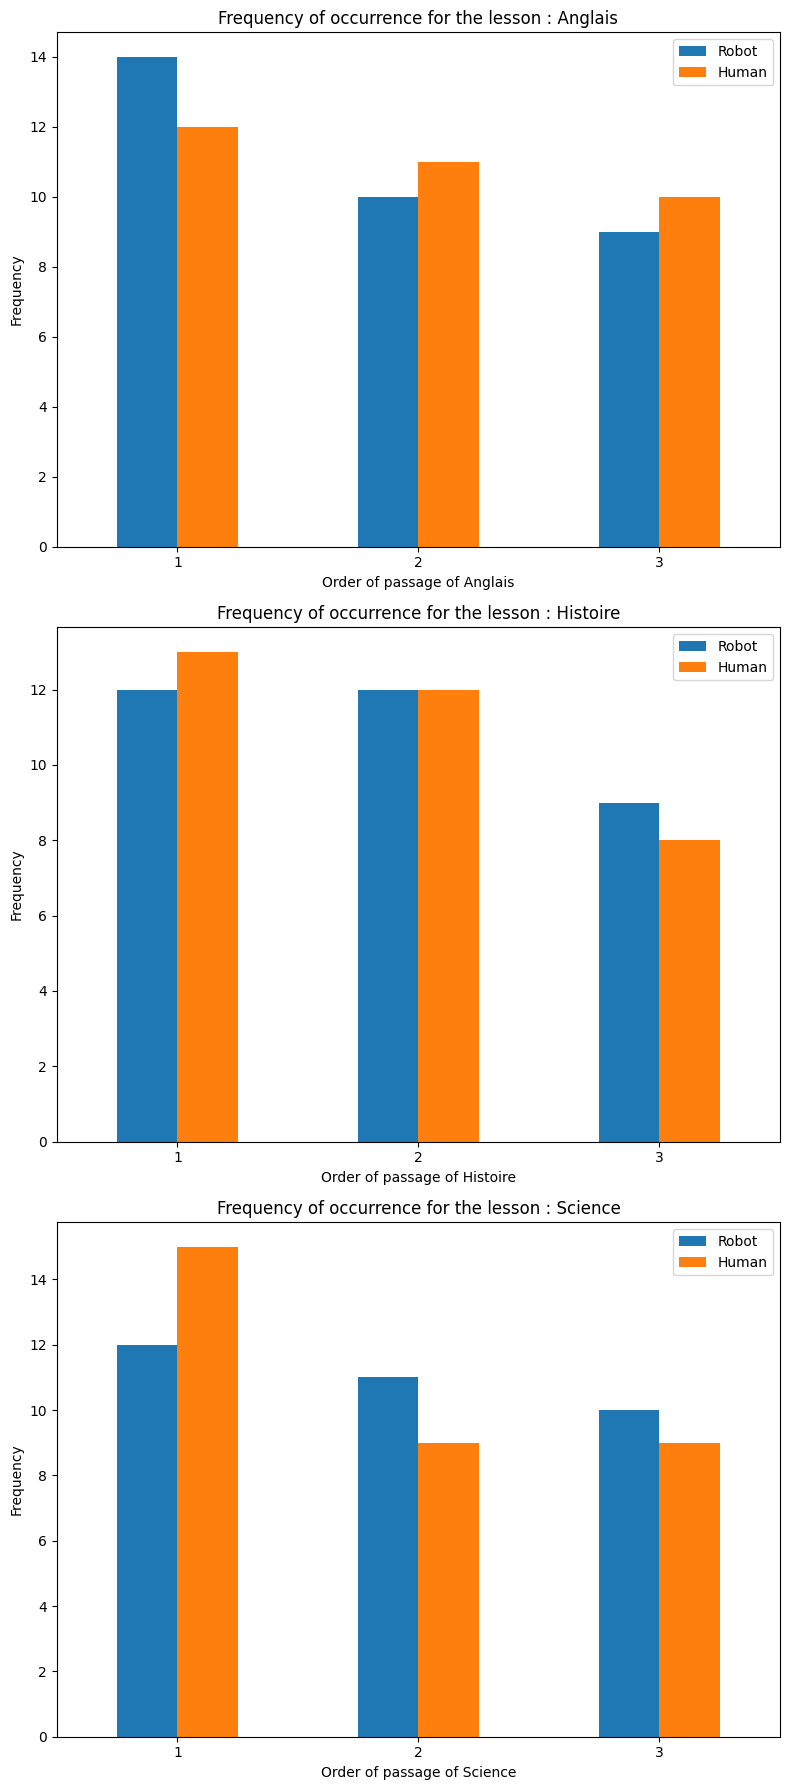

In [14]:
filename = 'plot_ordre_passage.png'
plot_ordre_passage(lecon_robot, lecon_humain)

<a name="1"></a>
## **PART 3: Feature Analysis**
---

### **3.1 Features Audio**

#### **3.1.1 Statistics descriptive under the different conditions**

##### Features statistics by partipants and agents

In [15]:
list_part = extract_list_participants(data_features)

In [16]:
features_stats = feature_statistics(data_features, list_part)
features_stats.head()

duration  mean_intensity  stddev_intensity  \
Part_1  robot mean     31.27           71.35              5.43   
              std      16.39            1.02              0.46   
        human mean     36.52           70.75              6.02   
              std      19.23            2.91              1.34   
Part_10 robot mean     15.33           70.40              6.16   

                    voiced_fraction  min_pitch  max_pitch  mean_pitch  \
Part_1  robot mean             0.61      72.79     522.45      183.82   
              std              0.04       2.40      85.60        5.88   
        human mean             0.67      72.15     462.76      171.90   
              std              0.10       1.78      83.34        8.77   
Part_10 robot mean             0.56      71.59     290.39      189.46   

                    stddev_pitch  mean_absolute_pitch_slope  mean_hnr  \
Part_1  robot mean         46.23                     379.41      9.00   
              std          16.42                      84.02      1.53   
        human mean         47.35                     421.28      8.42   
              std          10.49                      45.67      2.78   
Part_10 robot mean         43.99                     336.58     10.83   

                    stddev_hnr  jitter  shimmer  silence_threshold  \
Part_1  robot mean        5.99    0.03     0.16             -19.00   
              std         0.83    0.00     0.02               1.00   
        human mean        5.65    0.03     0.15             -18.71   
              std         1.17    0.01     0.03               2.63   
Part_10 robot mean        6.15    0.02     0.13             -19.57   

                    rate_of_speech  articulation_rate  speaking_duration  \
Part_1  robot mean            3.57               3.71              30.34   
              std             0.79               0.49              16.91   
        human mean            3.43               4.14              31.00   
              std             0.53               0.38              15.11   
Part_10 robot mean            2.71               3.29              13.83   

                    balance  
Part_1  robot mean     0.94  
              std      0.11  
        human mean     0.87  
              std      0.11  
Part_10 robot mean     0.87

##### Splitting dataset

In [17]:
data_humain, data_robot = split_humain_robot(data_features)
data_humain.head()

,Code,Genre,Ordre [Robot ],Ordre [Humain],Ordre passage robot [A/H/S],Ordre passage humain [A/H/S],Humain,First Robot,First Humain,Confort Robot,...,mean_absolute_pitch_slope,mean_hnr,stddev_hnr,jitter,shimmer,silence_threshold,rate_of_speech,articulation_rate,speaking_duration,balance
0,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,433.07,10.15,7.22,0.03,0.12,-20,3.0,4,43.4,0.7
1,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,358.07,11.42,7.14,0.02,0.10,-20,3.0,4,34.3,0.8
2,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,482.08,2.68,4.12,0.05,0.19,-13,4.0,4,2.8,0.9
3,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,383.13,7.97,4.74,0.03,0.19,-18,4.0,4,24.0,1.0
4,Part_1,F,2,1,1.1/2.1/3.1,3.2/2.2/1.2,F,Oui,Non,2,...,471.74,9.36,5.82,0.03,0.15,-20,3.0,4,28.8,0.8


##### Mean features of the robot interaction and human interaction among all participants

In [18]:
robot_stats = calculate_mean_std_stats(data_robot)
human_stats = calculate_mean_std_stats(data_humain)
concatenated_stats = pd.concat([robot_stats, human_stats], keys=['robot', 'human'])

In [19]:
concatenated_stats

duration  mean_intensity  stddev_intensity  voiced_fraction  \
robot mean     19.35           71.23              6.11             0.53   
      std      14.01            3.18              1.22             0.12   
human mean     25.95           69.44              6.96             0.59   
      std      18.83           13.38             12.22             0.10   

            min_pitch  max_pitch  mean_pitch  stddev_pitch  \
robot mean      77.97     372.38      149.91         39.74   
      std       13.69     130.40       39.44         15.86   
human mean      73.98     423.28      143.05         42.24   
      std        7.46     142.04       35.30         17.56   

            mean_absolute_pitch_slope  mean_hnr  stddev_hnr  jitter  shimmer  \
robot mean                     283.03      8.57        5.92    0.03     0.15   
      std                      113.09      2.27        0.95    0.01     0.03   
human mean                     331.00      7.76        5.29    0.03     0.16   
      std                      116.61      1.75        0.74    0.01     0.03   

            silence_threshold  rate_of_speech  articulation_rate  \
robot mean             -18.66            3.08               3.74   
      std                2.49            0.87               0.75   
human mean             -18.92            3.42               4.07   
      std                2.44            0.68               0.61   

            speaking_duration  balance  
robot mean              16.99     0.83  
      std               13.71     0.17  
human mean              22.36     0.85  
      std               16.56     0.13

##### Mean features of the robot interaction and human interaction after splitting the dataset into participants that started with a robot and participants that started with the human

In [20]:
data_humain_first, data_robot_first = split_data_by_starting_order(data_features)

In [21]:
data_humain_first_humain, data_humain_first_robot = split_humain_robot(data_humain_first)
data_robot_first_humain, data_robot_first_robot = split_humain_robot(data_robot_first)

In [22]:
robot_stats = calculate_mean_std_stats(data_humain_first_robot)
human_stats = calculate_mean_std_stats(data_humain_first_humain)

concatenated_stats_human_first = pd.concat([robot_stats, human_stats], keys=['robot', 'human'])

robot_stats = calculate_mean_std_stats(data_robot_first_robot)
human_stats = calculate_mean_std_stats(data_robot_first_humain)

concatenated_stats_robot_first = pd.concat([robot_stats, human_stats], keys=['robot', 'human'])

In [23]:
concatenated_stats_human_first

duration  mean_intensity  stddev_intensity  voiced_fraction  \
robot mean     22.95           70.72              5.67             0.54   
      std      15.96            3.83              1.26             0.12   
human mean     23.34           67.84              7.34             0.58   
      std      15.74           18.39             16.98             0.11   

            min_pitch  max_pitch  mean_pitch  stddev_pitch  \
robot mean      78.53     389.76      155.71         42.23   
      std       15.39     133.49       38.83         16.37   
human mean      75.27     416.46      147.14         42.90   
      std        8.59     144.64       35.03         19.93   

            mean_absolute_pitch_slope  mean_hnr  stddev_hnr  jitter  shimmer  \
robot mean                     300.20      7.95        5.78    0.03     0.16   
      std                      123.01      2.44        0.96    0.01     0.03   
human mean                     341.76      7.29        5.19    0.03     0.17   
      std                      133.39      1.89        0.78    0.01     0.03   

            silence_threshold  rate_of_speech  articulation_rate  \
robot mean             -17.96            3.30               3.74   
      std                3.11            0.77               0.67   
human mean             -18.16            3.51               4.15   
      std                3.15            0.72               0.62   

            speaking_duration  balance  
robot mean              20.92     0.87  
      std               15.70     0.14  
human mean              20.72     0.86  
      std               15.04     0.14

In [24]:
concatenated_stats_robot_first

duration  mean_intensity  stddev_intensity  voiced_fraction  \
robot mean     15.85           71.74              6.54             0.52   
      std      10.79            2.29              1.02             0.11   
human mean     28.76           71.17              6.54             0.61   
      std      21.39            1.88              0.65             0.09   

            min_pitch  max_pitch  mean_pitch  stddev_pitch  \
robot mean      77.42     355.47      144.26         37.31   
      std       11.86     125.61       39.38         15.03   
human mean      72.58     430.64      138.64         41.53   
      std        5.74     139.51       35.22         14.67   

            mean_absolute_pitch_slope  mean_hnr  stddev_hnr  jitter  shimmer  \
robot mean                     266.33      9.17        6.06    0.03     0.15   
      std                      100.27      1.91        0.92    0.01     0.03   
human mean                     319.40      8.27        5.40    0.03     0.15   
      std                       94.59      1.42        0.68    0.01     0.02   

            silence_threshold  rate_of_speech  articulation_rate  \
robot mean             -19.34            2.86               3.75   
      std                1.37            0.91               0.83   
human mean             -19.73            3.34               3.99   
      std                0.69            0.63               0.58   

            speaking_duration  balance  
robot mean              13.17     0.78  
      std               10.13     0.18  
human mean              24.14     0.84  
      std               17.97     0.11

##### Mean features of the robot interaction and human interaction after splitting the dataset into lessons

In [25]:
anglais_df, histoire_df, science_df = split_by_lecons(data_features)

In [26]:
anglais_humain, anglais_robot = split_humain_robot(anglais_df)
histoire_humain, histoire_robot = split_humain_robot(histoire_df)
science_humain, science_robot = split_humain_robot(science_df)

In [27]:
# Calculer les statistiques moyennes pour chaque leçon
anglais_robot_stats = calculate_mean_std_stats(anglais_robot)
anglais_human_stats = calculate_mean_std_stats(anglais_humain)

histoire_robot_stats = calculate_mean_std_stats(histoire_robot)
histoire_human_stats = calculate_mean_std_stats(histoire_humain)

science_robot_stats = calculate_mean_std_stats(science_robot)
science_human_stats = calculate_mean_std_stats(science_humain)

# Concaténer les DataFrames avec l'index spécifié
concatenated_stats = pd.concat([anglais_robot_stats, anglais_human_stats, histoire_robot_stats, histoire_human_stats, science_robot_stats, science_human_stats], 
                              keys=['Anglais Robot', 'Anglais Humain', 'Histoire Robot', 'Histoire Humain', 'Science Robot', 'Science Humain'])

In [28]:
concatenated_stats

duration  mean_intensity  stddev_intensity  \
Anglais Robot   mean     18.91           70.77              6.02   
                std      14.07            2.98              1.08   
Anglais Humain  mean     27.01           70.27              6.16   
                std      14.54            3.07              1.17   
Histoire Robot  mean     15.63           71.16              6.22   
                std      13.58            3.35              1.32   
Histoire Humain mean     21.97           67.78              8.27   
                std      19.80           21.48             19.91   
Science Robot   mean     24.63           71.83              6.06   
                std      13.02            3.11              1.25   
Science Humain  mean     29.60           70.61              6.18   
                std      20.59            3.07              1.11   

                      voiced_fraction  min_pitch  max_pitch  mean_pitch  \
Anglais Robot   mean             0.49      77.41     367.64      151.18   
                std              0.13       8.91     131.23       37.62   
Anglais Humain  mean             0.58      73.51     459.19      144.95   
                std              0.10       6.55     121.58       36.84   
Histoire Robot  mean             0.53      81.00     346.82      149.05   
                std              0.11      19.13     125.83       40.47   
Histoire Humain mean             0.59      74.60     381.73      141.47   
                std              0.10       8.95     148.52       34.88   
Science Robot   mean             0.57      74.68     410.49      149.62   
                std              0.10       7.58     128.27       40.60   
Science Humain  mean             0.60      73.68     437.72      143.08   
                std              0.10       6.33     142.10       34.70   

                      stddev_pitch  mean_absolute_pitch_slope  mean_hnr  \
Anglais Robot   mean         42.40                     282.25      8.78   
                std          18.11                     134.19      1.97   
Anglais Humain  mean         43.00                     330.52      7.93   
                std          14.20                     100.28      1.63   
Histoire Robot  mean         38.87                     285.77      8.68   
                std          16.42                     106.97      2.57   
Histoire Humain mean         40.48                     331.28      7.58   
                std          15.97                     124.25      1.92   
Science Robot   mean         37.95                     280.36      8.19   
                std          11.84                      95.97      2.12   
Science Humain  mean         43.59                     331.12      7.82   
                std          21.83                     123.36      1.65   

                      stddev_hnr  jitter  shimmer  silence_threshold  \
Anglais Robot   mean        6.35    0.03     0.15             -18.62   
                std         1.04    0.01     0.03               2.21   
Anglais Humain  mean        5.45    0.03     0.16             -19.09   
                std         0.77    0.01     0.03               2.10   
Histoire Robot  mean        5.89    0.03     0.16             -18.68   
                std         0.83    0.01     0.03               2.72   
Histoire Humain mean        5.20    0.03     0.16             -18.69   
                std         0.73    0.01     0.03               2.70   
Science Robot   mean        5.50    0.03     0.16             -18.67   
                std         0.78    0.01     0.03               2.49   
Science Humain  mean        5.24    0.03     0.16             -19.01   
                std         0.72    0.01     0.03               2.43   

                      rate_of_speech  articulation_rate  speaking_duration  \
Anglais Robot   mean            2.73               3.49              16.21   
                std             0.86               0.79              13.88   
Anglais Humain

#### **3.1.2 Impact of the starting order on the features**

##### 1.Splitting data and taking only the french part 

In [29]:
data_english, data_french = split_by_language(data_features)

##### 2.Splitting data by starting order of passage ( first with the robot or first with the human ) 

In [30]:
first_human, first_robot = split_data_by_starting_order(data_french)

##### 3. Calculating the difference of first intervenant - second by features and doing a mannwhitneyu test 

In [31]:
diff_human = feature_difference_by_part(first_human, 'humain')
diff_robot = feature_difference_by_part(first_robot, 'robot')

In [32]:
p_value_df = calculate_mannwhitneyu_p_value(diff_human, diff_robot)
p_value_df

,Features,p-value,Distribution different
10,stddev_hnr,0.0001,strong evidence
15,articulation_rate,0.0005,strong evidence
1,mean_intensity,0.0006,strong evidence
8,mean_absolute_pitch_slope,0.0007,strong evidence
3,voiced_fraction,0.0010,strong evidence
11,jitter,0.0044,strong evidence
9,mean_hnr,0.0096,strong evidence
6,mean_pitch,0.0135,strong evidence
0,duration,0.0151,strong evidence
4,min_pitch,0.0208,strong evidence


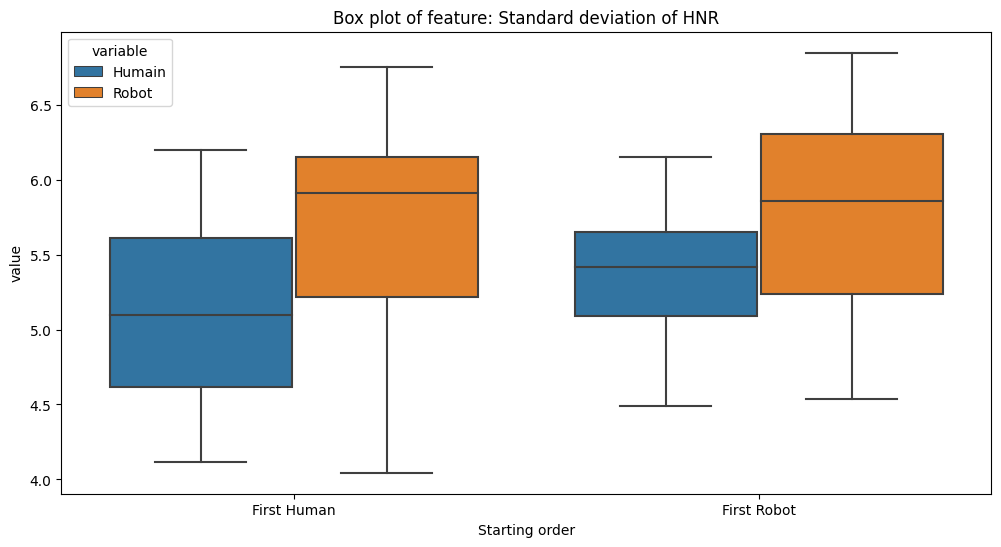

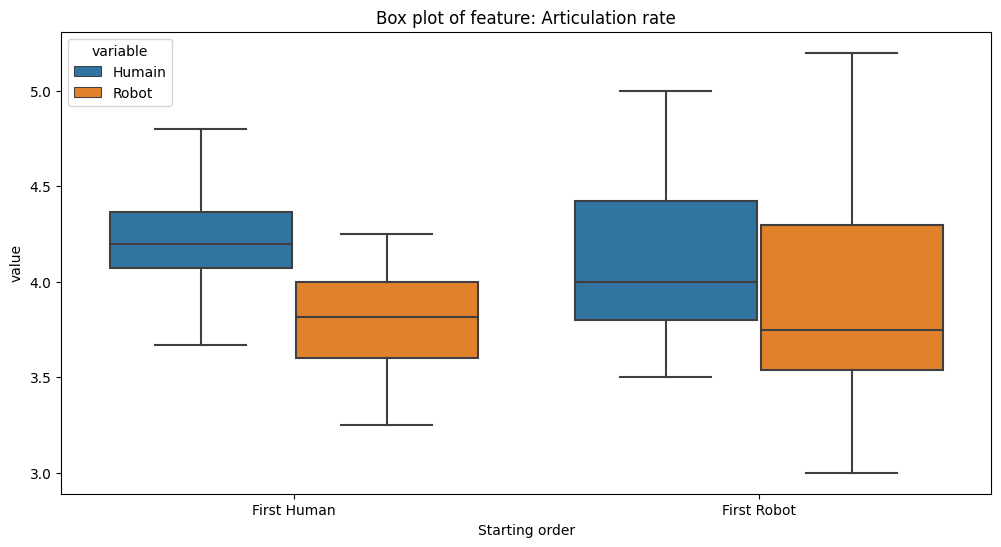

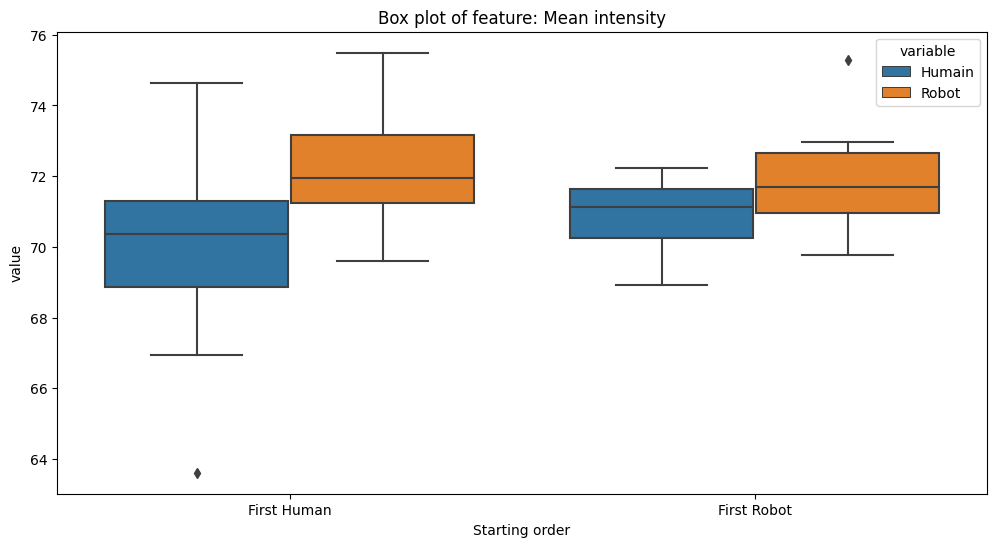

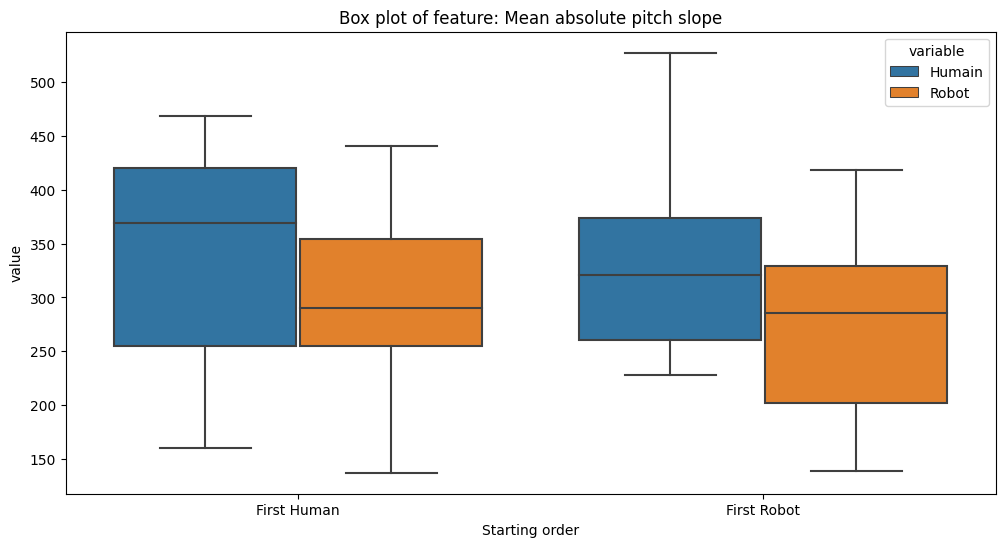

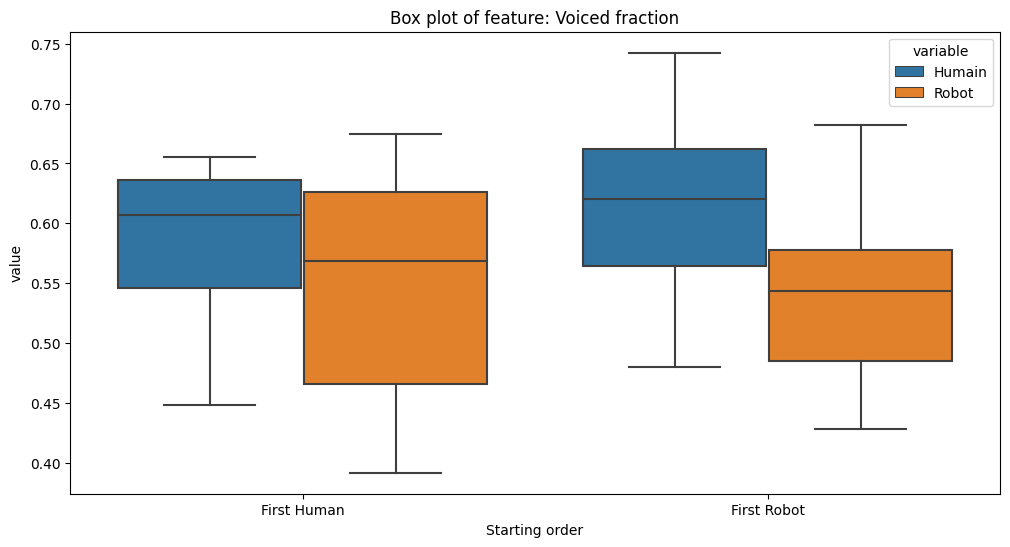

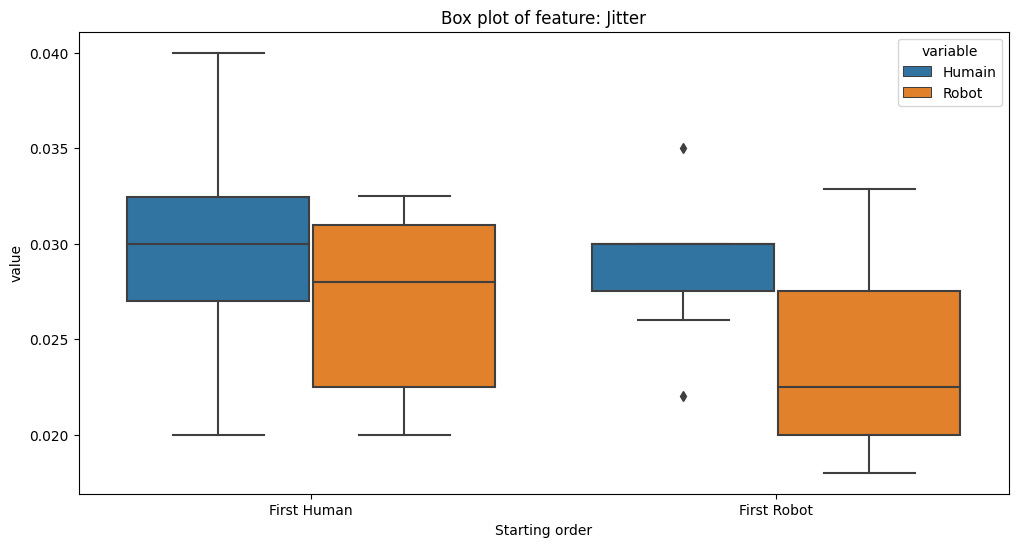

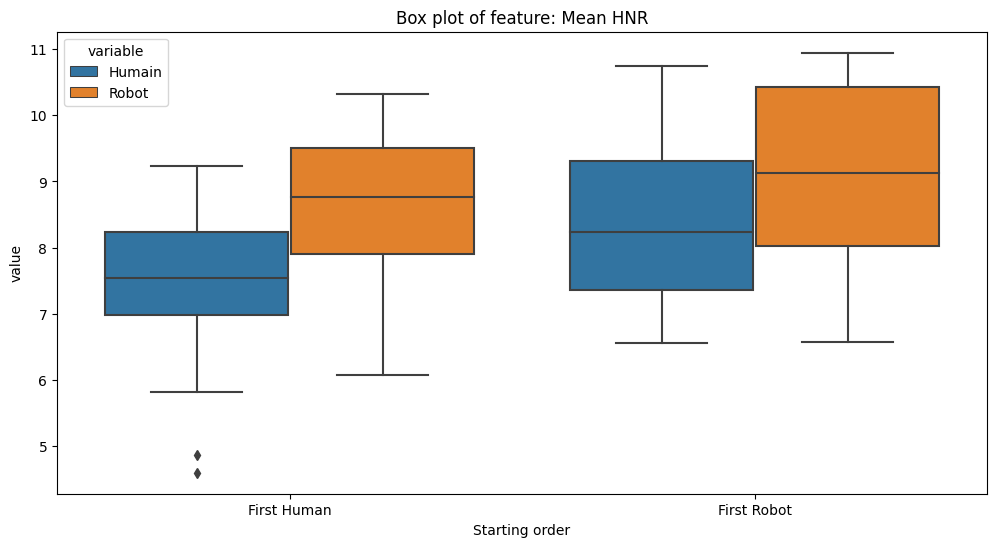

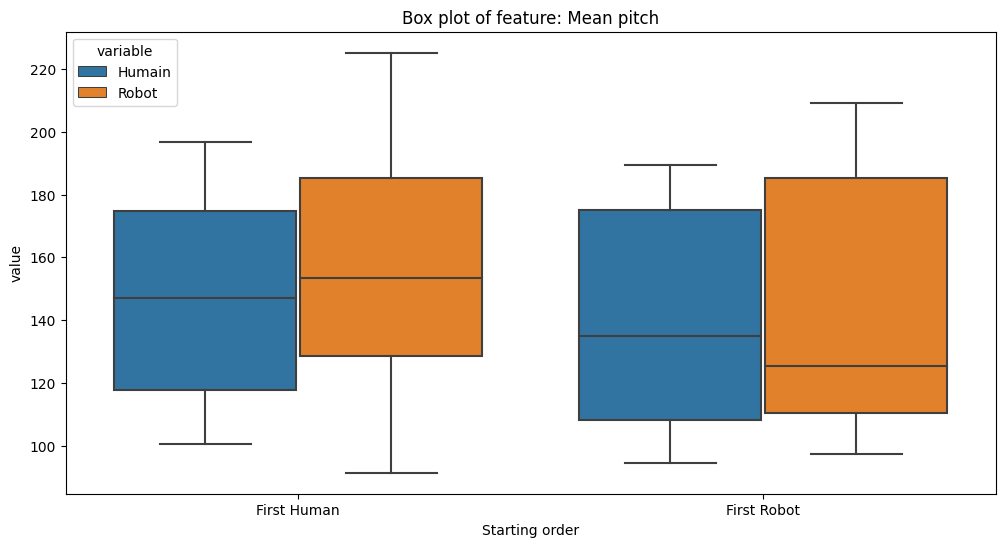

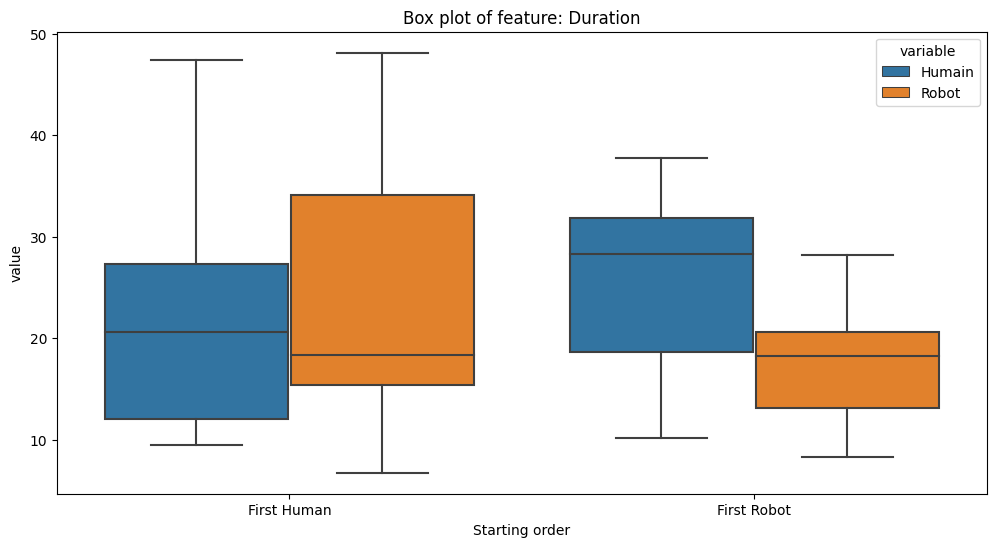

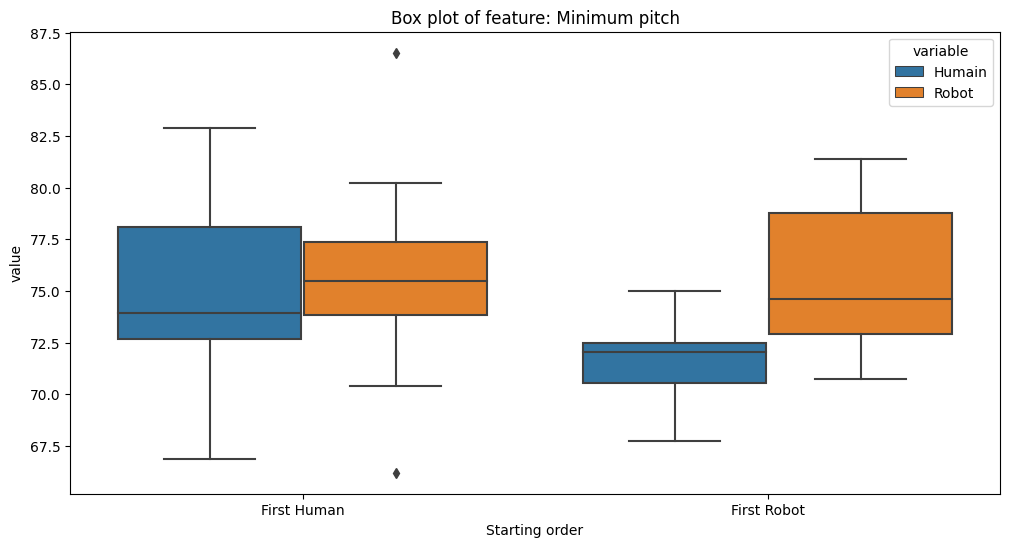

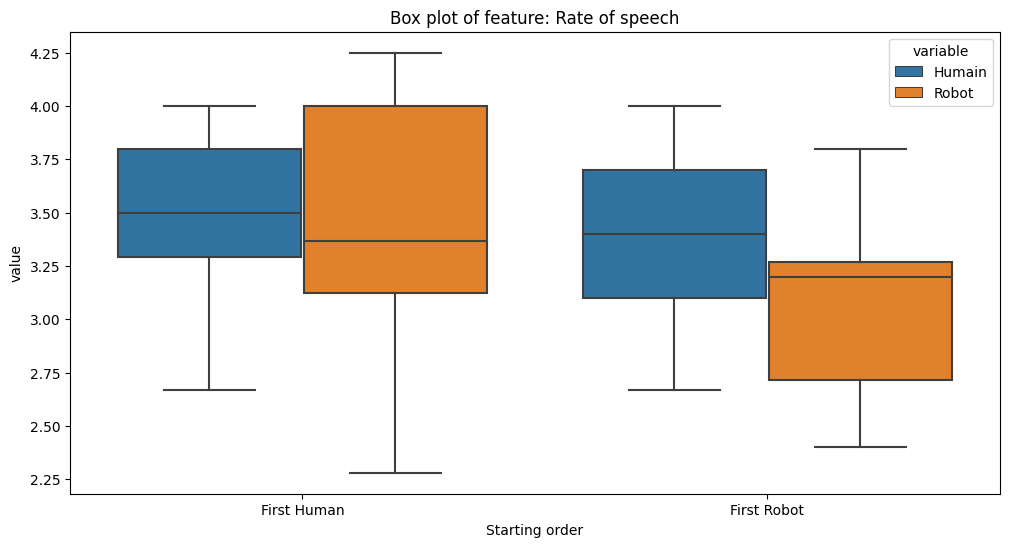

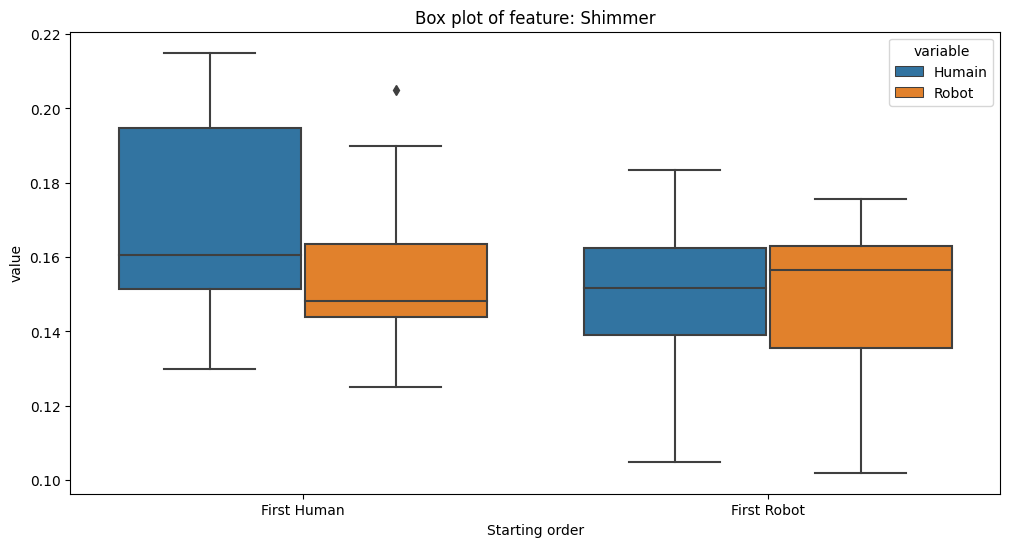

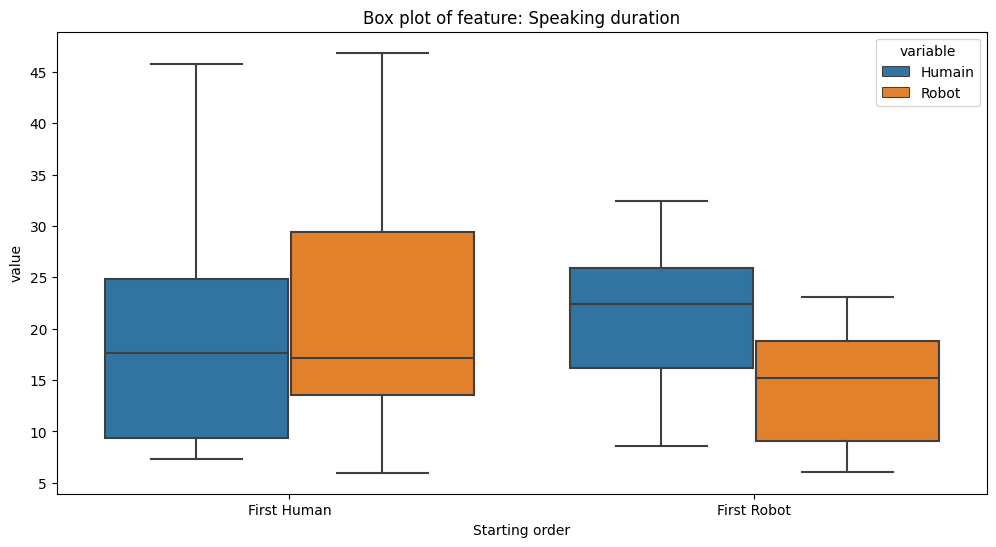

In [33]:
hf_human_df, hf_robot_df, rf_human_df, rf_robot_df = box_plot_features_significant_starting_order(p_value_df, data_french)

#### **3.1.2 Impact of the langguage on the features**

1. Select only the first interaction

In [34]:
data_human_first, data_robot_first = split_data_by_starting_order(data_features)

In [35]:
data_human_first, _ = split_humain_robot(data_human_first)
_, data_robot_first = split_humain_robot(data_robot_first)

2. Selecting the name of the first lecon in french

In [36]:
data_humain_first = split_and_determine_first_french(data_humain_first, 'Ordre passage humain [A/H/S]')
data_robot_first = split_and_determine_first_french(data_robot_first, 'Ordre passage robot [A/H/S]')

In [37]:
hf_french, hf_english = calculate_language_mean_features_languages(data_humain_first)
p_value_df_human = calculate_wilcoxon_p_value(hf_french, hf_english)

rf_french, rf_english = calculate_language_mean_features_languages(data_robot_first)
p_value_df_robot = calculate_wilcoxon_p_value(rf_french, rf_english)

In [ ]:
p_value_df_human[p_value_df_human['Distribution different'] == "strong evidence"]

,Features,p-value,Distribution different
12,shimmer,0.0185,strong evidence
9,mean_hnr,0.0256,strong evidence
15,articulation_rate,0.0439,strong evidence


In [ ]:
p_value_df_robot[p_value_df_robot['Distribution different'] == "strong evidence"]

,Features,p-value,Distribution different
10,stddev_hnr,0.0015,strong evidence
3,voiced_fraction,0.0054,strong evidence
14,rate_of_speech,0.0057,strong evidence
1,mean_intensity,0.0353,strong evidence
15,articulation_rate,0.0461,strong evidence


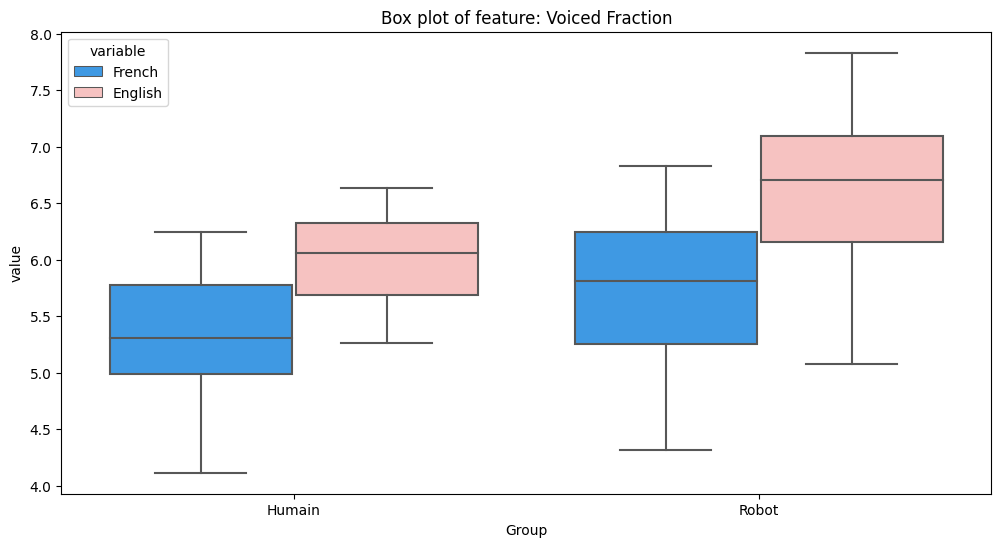

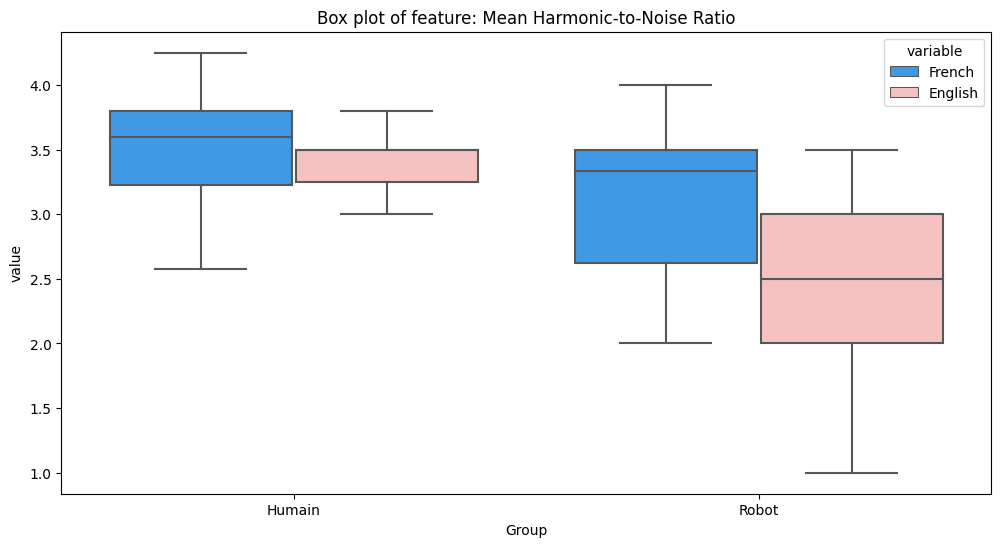

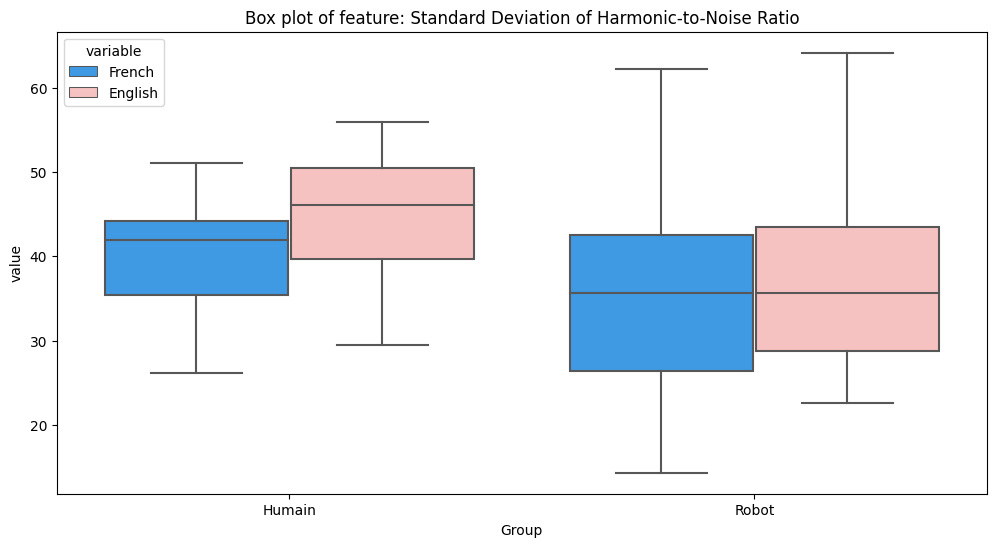

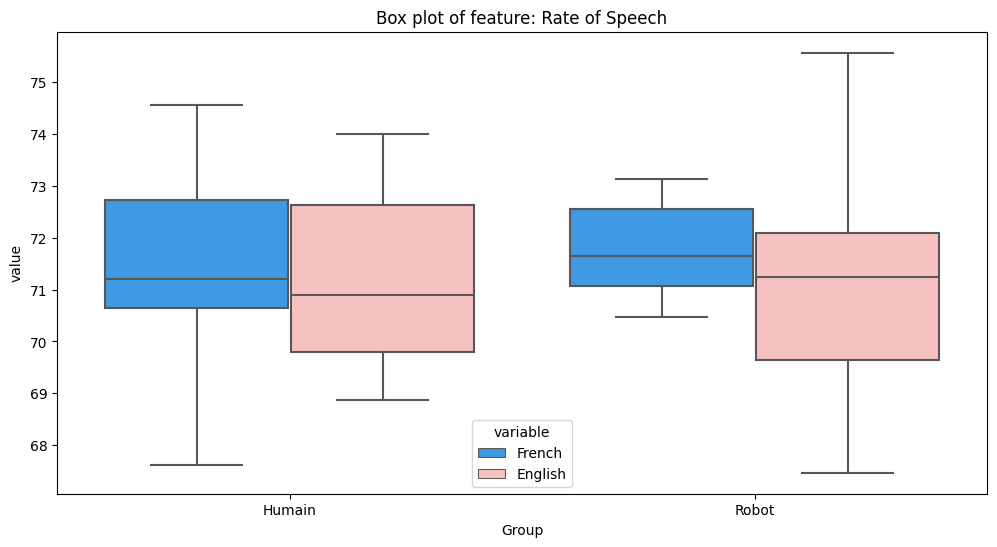

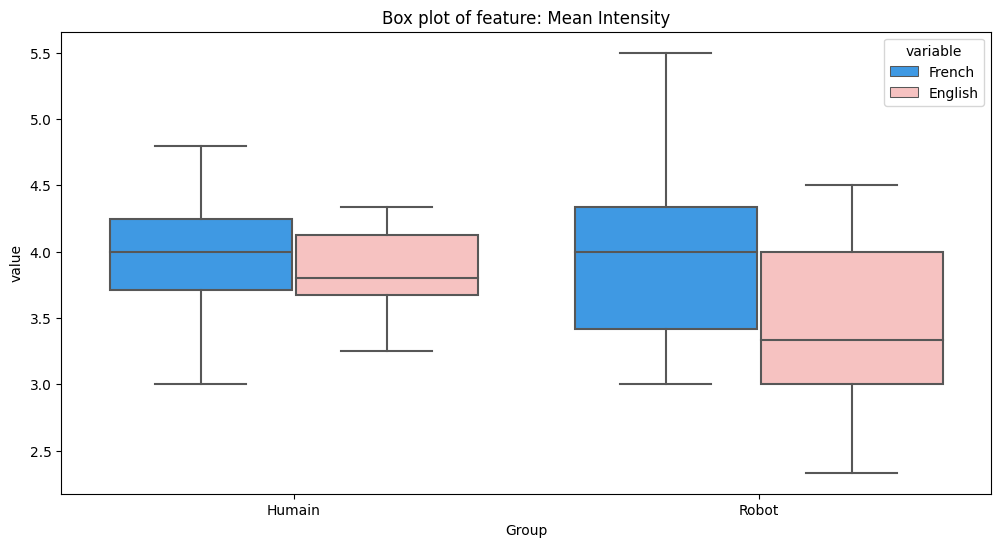

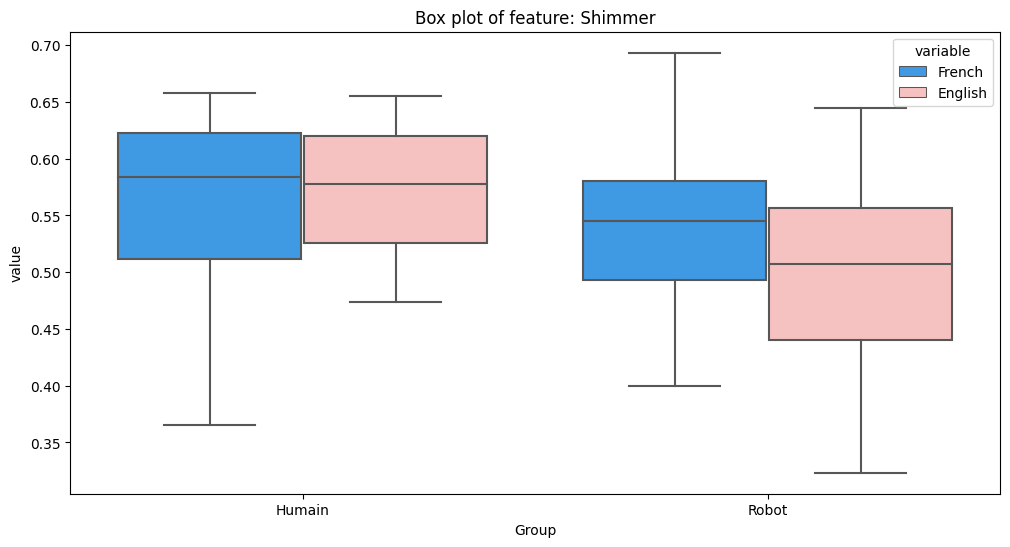

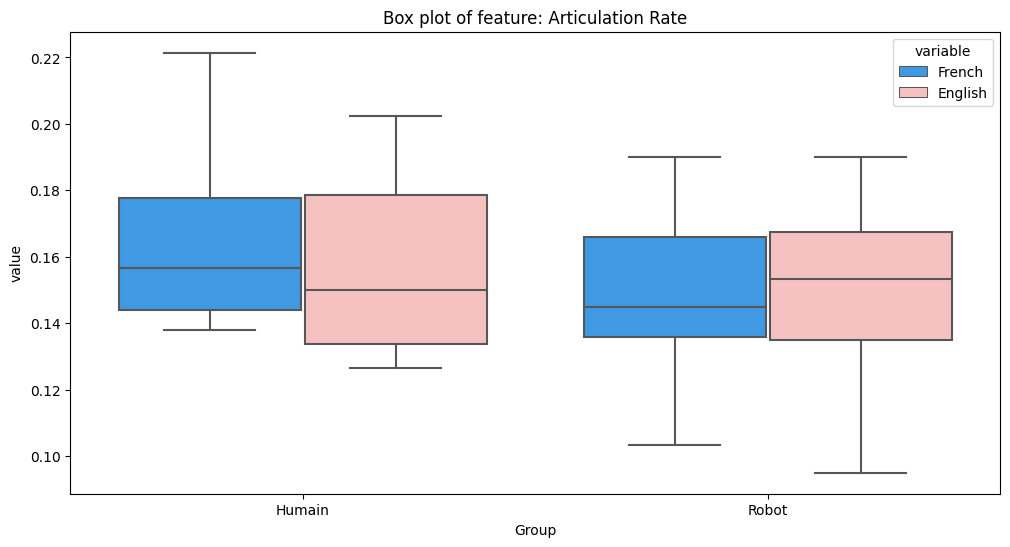

In [82]:
box_plot_features_significant_languages(hf_french, hf_english, rf_french, rf_english, p_value_df_human, p_value_df_robot)

#### **3.1.3 Comparison of the interaction with a robot and with the human: Isolating other effects**

Taking all of the first interaction 

In [39]:
data_english, data_french = split_by_language(data_features)
data_human_first, data_robot_first = split_data_by_starting_order(data_french)
data_human_first, _ = split_humain_robot(data_human_first)
_, data_robot_first = split_humain_robot(data_robot_first)

In [40]:
mean_first_human = calculate_mean_features_first_int(data_human_first)
mean_first_robot = calculate_mean_features_first_int(data_robot_first)

In [41]:
p_value_df = calculate_mannwhitneyu_p_value(mean_first_human, mean_first_robot) 

In [42]:
p_value_df[p_value_df['Distribution different'] == "strong evidence"]

,Features,p-value,Distribution different
1,mean_intensity,0.0019,strong evidence
9,mean_hnr,0.0037,strong evidence
10,stddev_hnr,0.0068,strong evidence
11,jitter,0.0125,strong evidence
14,rate_of_speech,0.0165,strong evidence


In [43]:
feature_signigicant = p_value_df[p_value_df['Distribution different'] == "strong evidence"]['Features'].tolist()
feature_signigicant

['mean_intensity', 'mean_hnr', 'stddev_hnr', 'jitter', 'rate_of_speech']

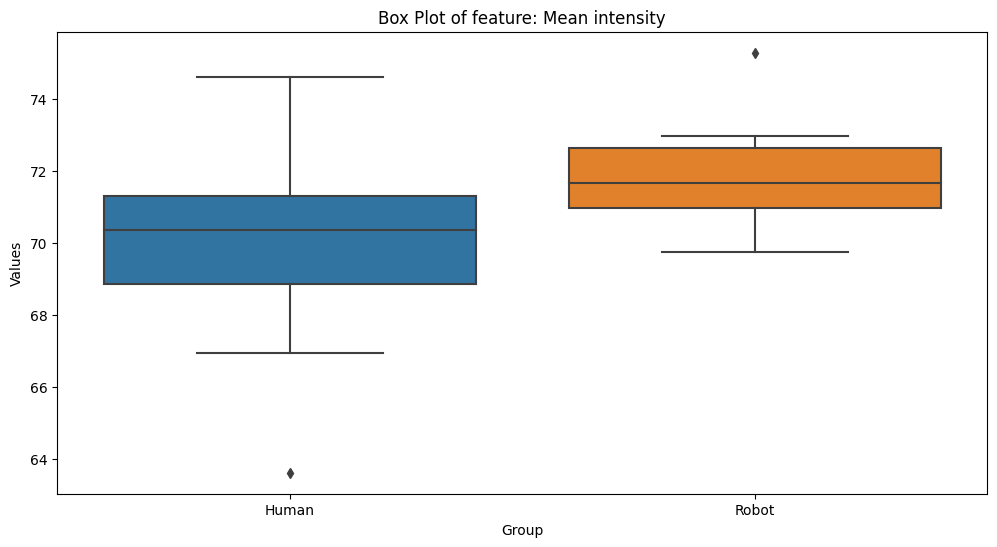

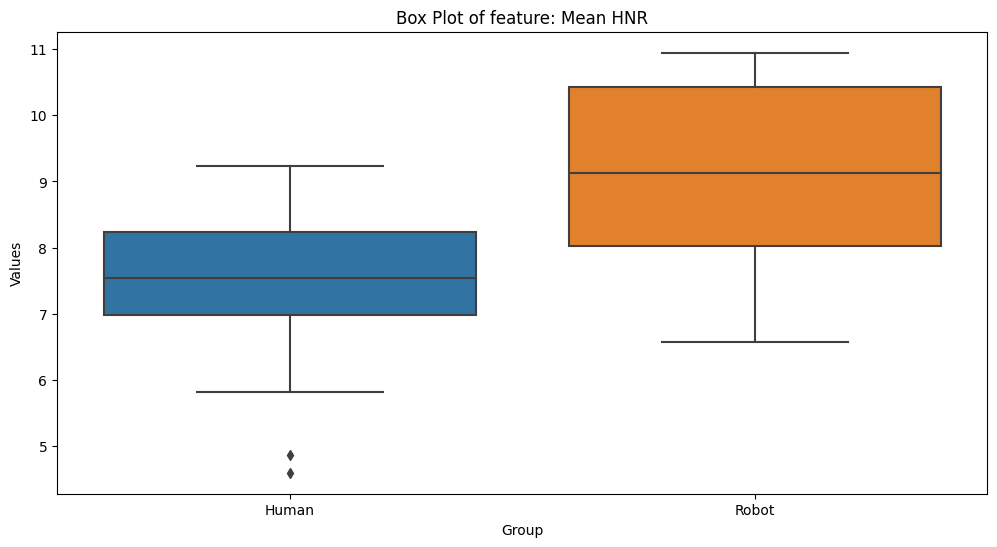

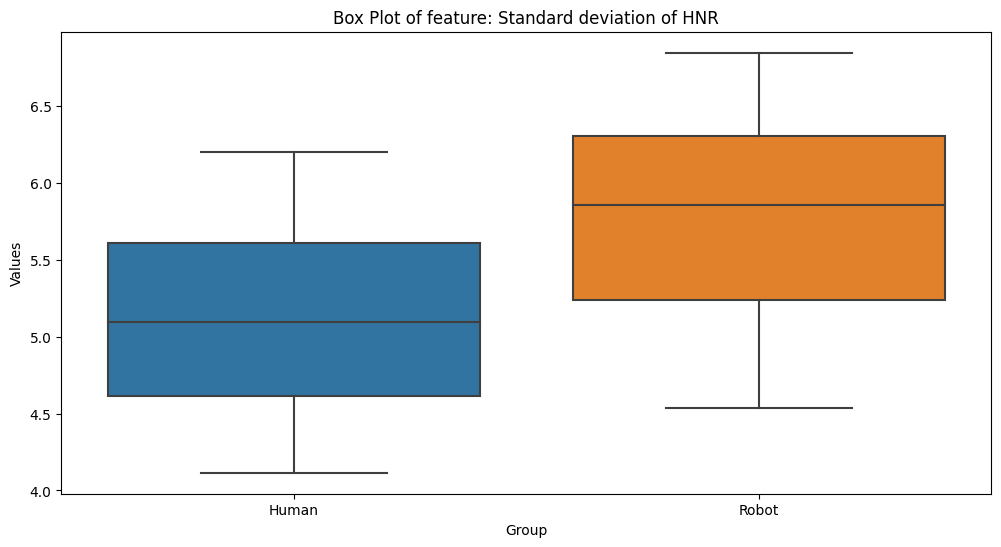

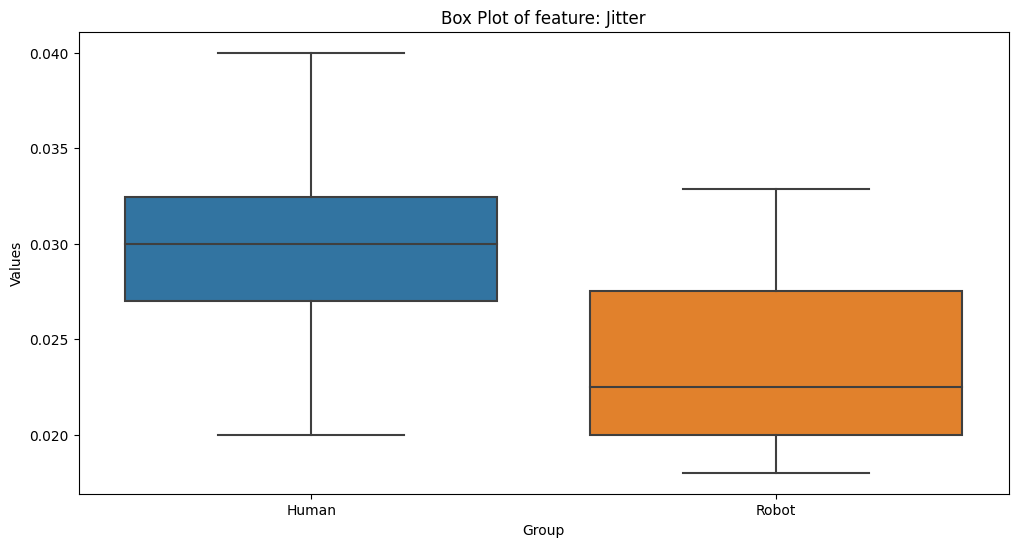

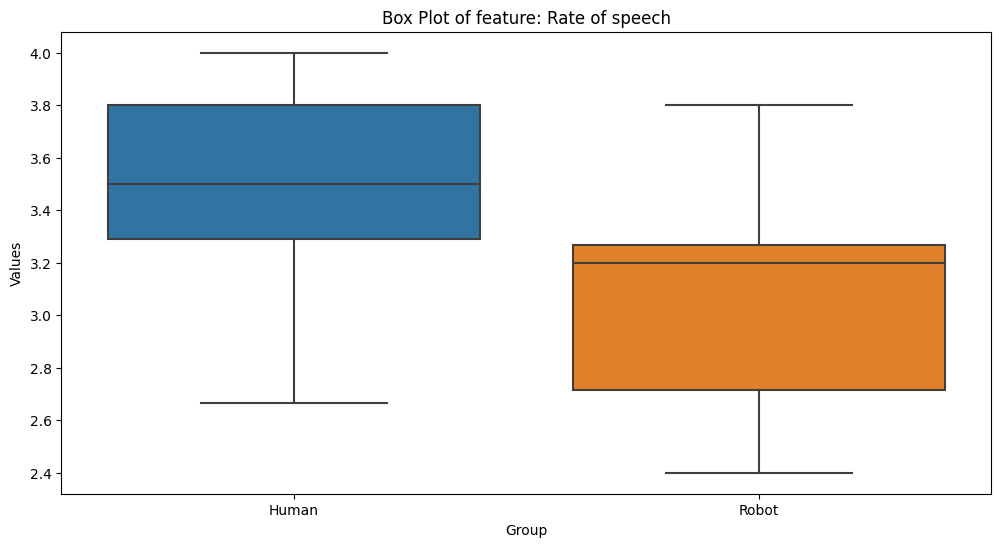

In [44]:
box_plot_features_significant_human_robot(mean_first_human, mean_first_robot, p_value_df )

### **3.2 Questionnaires analysis**

##### Comparison of Comfort between Human and Robot: Visual Analysis

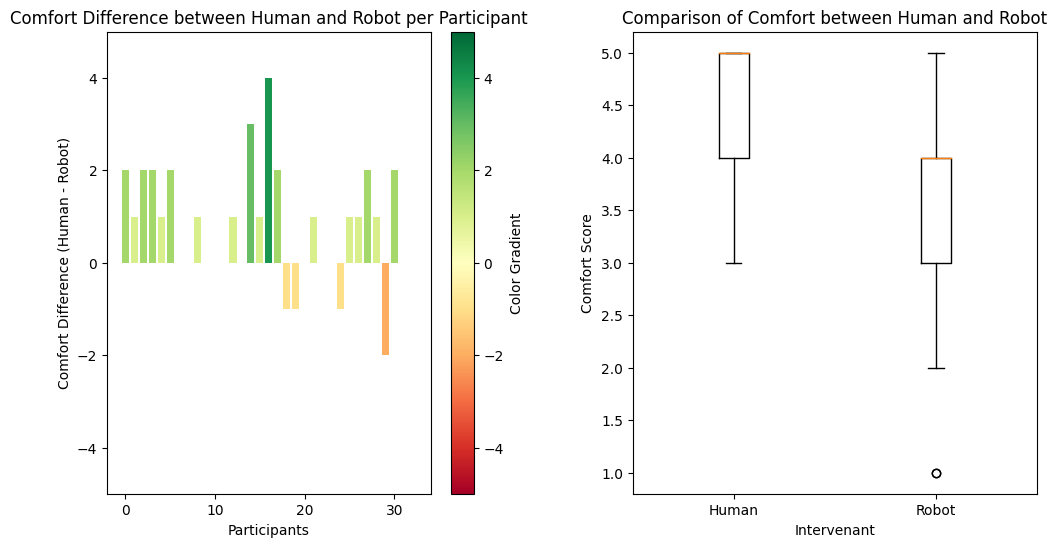

In [40]:
confort = plot_confort_ecart(dataframe_questionnaire)

##### **Comparison of Comfort between Human and Robot after splitting the dataset depending on the starting order : Visual Analysis**

In [41]:
data_human_first, data_robot_first = split_data_by_starting_order(dataframe_questionnaire)

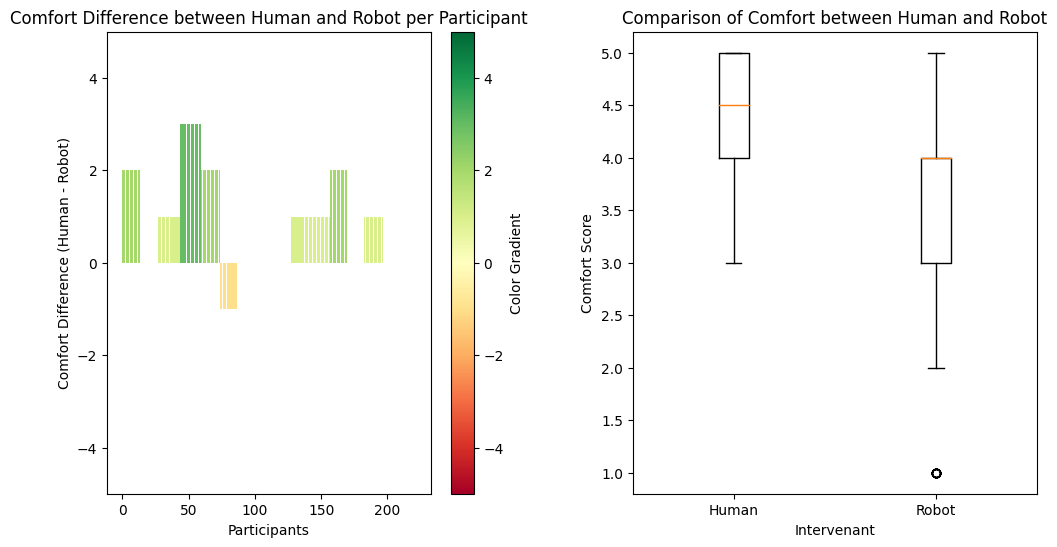

In [42]:
confort_humain_first = plot_confort_ecart(data_humain_first)   

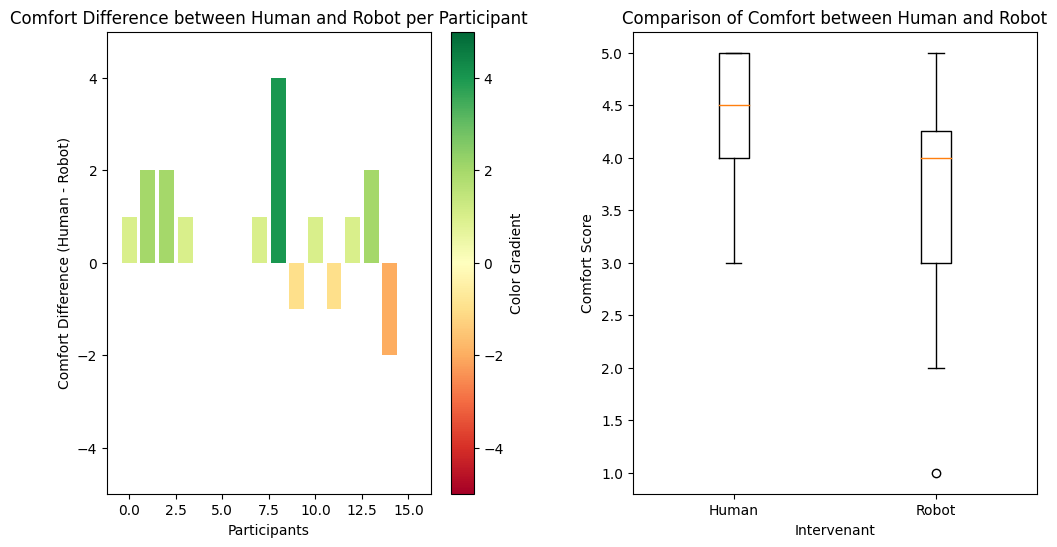

In [43]:
confort_robot_first = plot_confort_ecart(data_robot_first)   